# DMHR ASSIGNMENT TBBV7

In [ ]:
GitHub link: 

# Assignment A
Assignment A [25 marks]
The NHS has been challenged to make “efficiency savings” and you have been commissioned by an NHS executive to review, document and assess GP prescribing costs. Using data from the HSCIC GP Practice Prescribing dataset for your assigned city only, address the following queries using a combination of narrative, tables, figures and descriptive statistcs:

In [1]:
#preliminaries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [108]:
#importing HSCIC prescribing data

HSCIC_pres_url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv'
cols_pres = ['sha', 'pct', 'practice', 'bnf_code', 'bnf_name', 'items', 'nic', 'act_cost', 'quantity', 'period']
HSCIC_pres =  pd.read_csv(HSCIC_pres_url, header=None, names=cols_pres, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())

In [5]:
#importing HSCIC practice data

HSCIC_prac_url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv'
cols = ['period','practice','practicename','centre','street','town','district', 'postcode']
HSCIC_prac = pd.read_csv(HSCIC_prac_url, index_col=False, header=None, names=cols)

,period,practice,practicename,centre,street,town,district,postcode
0,201512,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,201512,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,201512,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
3,201512,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,201512,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ


# A1. 
Identify all GP practices and produce a table with the total number of prescriptions and their total actual cost (using the ACT COST column).


.

In [111]:
#creating DataFrame from practice data including only practices where town starts with Bradford.
almost_bradford = HSCIC_prac['town'].str.startswith('BRADFOR')
almost_bradford_prac = HSCIC_prac[almost_bradford]

#removed one practice that is BRADFORD ON AVON, postcode starts with BA, find its index:
almost_bradford_prac.index[almost_bradford_prac['postcode'].str.startswith('BA')].tolist()
almost_bradford_prac.loc[4135]

period                                            201512
practice                                          J83030
practicename    BRADFORD-ON-AVON AND MELKSHAM HEALTH    
centre                         THE HEALTH CENTRE        
street                         STATION APPROACH         
town                           BRADFORD-ON-AVON         
district                       WILTSHIRE                
postcode                       BA15 1DQ                 
Name: 4135, dtype: object

In [112]:
#remove Bradford on Avon row
bradford_prac = almost_bradford_prac[almost_bradford_prac.practice != 'J83030']

#merge with prescription data
bradford_df = pd.merge(left=bradford_prac, right=HSCIC_pres, on='practice')

#group by practice, sum costs
bradford_practices = bradford_df.groupby('practice')[['quantity', 'act_cost']].sum().reset_index()
bradford_practices.columns = ['practice','Total Quantity', 'Total Actual Cost']
pd.DataFrame(bradford_practices)

#Summary table of actual costs for Bradford practices

,practice,Total Quantity,Total Actual Cost
0,B83005,1349872,114620.15
1,B83007,1005866,77886.58
2,B83008,1961372,170412.98
3,B83009,1646277,156655.77
4,B83010,2018828,153023.22
5,B83011,1071440,82932.44
6,B83012,1024207,79736.87
7,B83013,1710224,171071.45
8,B83015,1511786,134565.70
9,B83016,1171759,87315.22


# A2. 
Find the top ten most/least frequently prescribed medications across all practices. What is their total actual cost and how does that compare to the overall actual costs of each practice and of the entire city?

In [113]:

#New DataFrame 'bradford_pres' to include summed prescription quantity and cost data grouped by medication name
bradford_pres = bradford_df.groupby('bnf_name')[['quantity', 'act_cost']].sum()
#sort by most prescribed
bradford_mostpres= bradford_pres.sort_values('quantity', ascending= False, kind='quicksort', na_position='last' )
bradford_mostpres.columns = ['Total prescriptions, all practices', 'cost(£)']
bradford_top10pres = bradford_mostpres.head(10)
pd.DataFrame(bradford_top10pres['Total prescriptions, all practices'])

#Table of top 10 most prescribed medication across all Bradford practices

,"Total prescriptions, all practices"
bnf_name,
Ensure Plus_Milkshake Style Liq(10 Flav),4058340
Jevity 1.5kcal_Liq,1600040
Diprobase_Crm,1527000
Paracet_Tab 500mg,1421522
Ensure Compact_Liq (3 Flav),1272125
Lactulose_Soln 3.1g-3.7g/5ml,1202415
Methadone HCl_Mix 1mg/1ml S/F,1196591
PaediaSure Plus_Liq (3 Flav),968272
Aveeno_Crm,906400


In [114]:
#sort bradford_pres by least prescribed
bradford_leastpres= bradford_pres.sort_values('quantity', ascending= True, kind='quicksort')
bradford_leastpres.columns = ['Total prescriptions, all practices', 'cost(£)']
bradford_bottom10pres = bradford_leastpres.head(10)
pd.DataFrame(bradford_bottom10pres['Total prescriptions, all practices'])

#Table of top 10 least prescribed medications across all Bradford practices

,"Total prescriptions, all practices"
bnf_name,
Dansac_Tube,1
Beclomet Diprop_Aq Nsl Spy 50mcg (100 D),1
Hepat B_Vac 40mcg/ml 1ml Vl,1
Ins Hypurin Pore Isop_100u/ml 10ml Vl,1
Canesten AF_Dual Action Atom Spy 1% 25ml,1
Surg Suture W9515T Absorb Ster Syn,1
Triptorelin Embon_Inj 11.25mg Vl + Dil,1
Zn Ox 2.5cm x 5m Surg Adh Tape,1
Hedrin_Soln Spy 4% 120ml,1


In [115]:
#Top 10 most frequently prescribed total actual cost 
total_10most = str(bradford_top10pres['cost(£)'].sum())

#Top 10 least frequently prescribed total actual cost
total_10least = str(bradford_bottom10pres['cost(£)'].sum())

print('The total actual cost of the 10 most frequently prescribed medications in Bradford for Decemeber 2015 is £' + total_10most )
print('')
print('The total actual cost of the 10 least frequently prescribed medications in Bradford for Decemeber 2015 is £' + total_10least )

The total actual cost of the 10 most frequently prescribed medications in Bradford for Decemeber 2015 is £177902.14999999997

The total actual cost of the 10 least frequently prescribed medications in Bradford for Decemeber 2015 is £324.63


In [116]:
#summary statistics for the overall actual costs for the city of Bradford
bradford_practices['Total Actual Cost'].describe()

count        85.000000
mean      69593.716824
std       63038.077910
min          10.920000
25%       10001.820000
50%       54748.580000
75%      122767.240000
max      306762.210000
Name: Total Actual Cost, dtype: float64

In [117]:
# count number of practices with overall actual costs greater or less than frequently and least frequently prescribed
#more than most prescribed:
bradford_practices[bradford_practices['Total Actual Cost'] > 177902.15 ].count() 

practice             2
Total Quantity       2
Total Actual Cost    2
dtype: int64

In [118]:
#less than the least prescribed:
bradford_practices[bradford_practices['Total Actual Cost'] < 324.63 ].count() 

practice             14
Total Quantity       14
Total Actual Cost    14
dtype: int64

In [119]:
city_cost = float(sum(bradford_df['act_cost']))
print(city_cost)

5915465.930000041


The mean practice spend on medication in Bradford for December 2015 is £69,593.72

Comparing total spend on the 10 most frequently prescribed medications to individual practice drug spend in Bradford for December 2015 shows that only 2 practices individually spent more than the total city spent on the 10 most frequently prescribed medications. 

Comparing total spend on the 10 least frequently prescribed medications to individual practice drug spend in Bradford for December 2015 shows that 14 practices individually spent less than the total city spent on the 10 least frequently prescribed medications. 

The total spend on drugs for the whole of Bradford for December 2015 was £5,915,465.93

The percentage of this total spend that is contributed to by the top ten most and least frequently prescribed drugs in Bradford is presented in the below pie chart. 


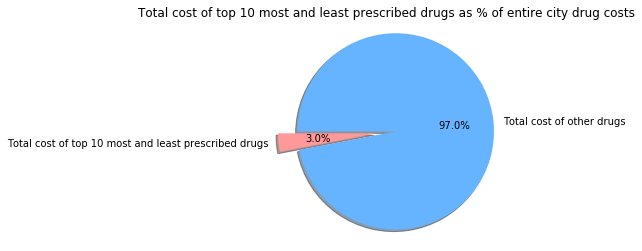

In [120]:
#total act cost for the city
city_cost = float(sum(bradford_df['act_cost']))
#the % of the actual cost of drugs for the entire city attributed to the top 10 and bottom 10 most prescribed drugs
drugsofinterest_pie = ((float(total_10most) + float(total_10least))/ city_cost) * 100

rest_pie = 100 - drugsofinterest_pie

#pie chart to show above
labels = 'Total cost of top 10 most and least prescribed drugs','Total cost of other drugs'
sizes = [drugsofinterest_pie, rest_pie]
explode = (0.2, 0)
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, colors= colors, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total cost of top 10 most and least prescribed drugs as % of Bradford city drug costs')
plt.show()

# A3.
Find the top ten most expensive medications and calculate their total actual cost.

In [121]:
bradford_exp = bradford_df.groupby('bnf_name')[['act_cost']].max()

bradford_mostexp= bradford_exp.sort_values('act_cost', ascending= False, kind='quicksort')

bradford_mostexp.columns = ['cost(£)']
#top 10
bradford_10mostexp = bradford_mostexp.head(10)

pd.DataFrame(bradford_10mostexp)
#Table of the top ten most expensive medications prescribed in Bradford

,cost(£)
bnf_name,
Trientine Dihydroch_Cap 300mg (Old),11160.61
Influenza_Vac Inact 0.5ml Pfs,8311.44
Buprenorph/Naloxone_Tab Subling8mg/2mgSF,6774.93
Omnitrope SurePal 15_Inj 15mg/1.5ml Cart,6137.20
Seretide 250_Evohaler 250mcg/25mcg(120D),5390.66
Methadone HCl_Mix 1mg/1ml S/F,5382.20
Incruse Ellipta_Inh 55mcg (30D),5342.33
Tiotropium_Pdr For Inh Cap 18mcg,4461.53
Sitagliptin_Tab 100mg,4195.84


In [122]:
# sum cost of top ten most expensive medications
total_10exp= str(bradford_10mostexp['cost(£)'].sum())

print('The total actual cost of the top ten most most expensive medications in Bradford is £' + total_10exp )

The total actual cost of the top ten most most expensive medications is £61168.51


# A4.
How does prescribing (frequency and costs) in your city compare when using prescribing data from Cambridge as a reference?

.

In [123]:
#creating DataFrame from practice data including only practices in Cambridge, filter on town 
cambridge = HSCIC_prac['town'].str.startswith('CAMBRIDG') 
cambridge_prac = HSCIC_prac[cambridge]
#merge with prescription data
cambridge_df = pd.merge(left=cambridge_prac, right=HSCIC_pres, on='practice')
cambridge_prac['practice'].count()

35

In [124]:
#Calculating summary of act_cost and prescription frequency for both Bradford and Cambridge. 
print('Bradford totals are: ' +str(sum(bradford_df['act_cost'])) +' sterling spent, '+ str(sum(bradford_df['quantity'])) +' units prescribed')

print('Cambridge totals are: ' +str(sum(cambridge_df['act_cost'])) +' sterling spent, '+str(sum(cambridge_df['quantity'])) +' units prescribed')


Bradford totals are: 5915465.93 sterling spent, 73378278 units prescribed
Cambridge totals are: 2607317.49 sterling spent, 26595316 units prescribed


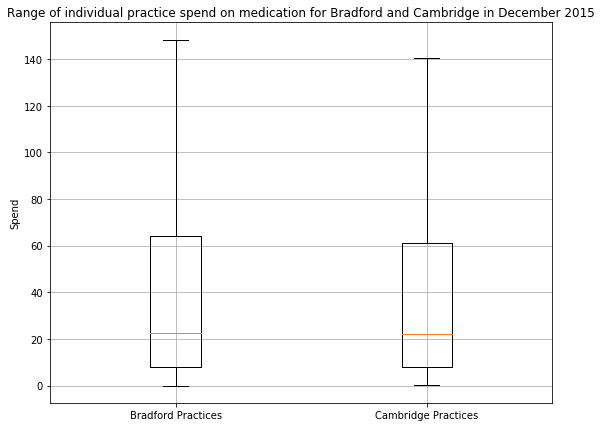

In [125]:
#boxplot of comparitive spend excluding outliers
plt.figure(figsize=(9,7))
plt.boxplot([bradford_df['act_cost'],cambridge_df['act_cost']],positions = [0,1], widths = 0.2, showfliers=False)
plt.grid()
plt.xticks([0,1],['Bradford Practices', 'Cambridge Practices'])
plt.ylabel('Spend (sterling)')
plt.title('Range of individual practice spend on medication for Bradford and Cambridge in December 2015')

plt.show()


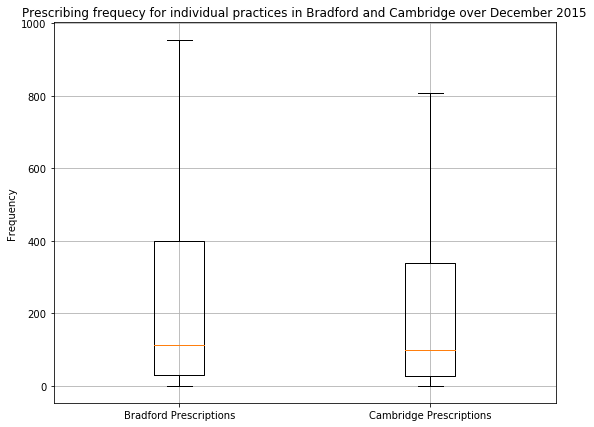

In [126]:
#boxplot of comparative prescriptions excluding outliers
plt.figure(figsize=(9,7))
plt.boxplot([bradford_df['quantity'],cambridge_df['quantity']],positions = [0,1], widths = 0.2, showfliers=False)
plt.grid()
plt.xticks([0,1],['Bradford Prescriptions', 'Cambridge Prescriptions'])
plt.ylabel('Frequency')
plt.title('Prescribing frequecy for individual practices in Bradford and Cambridge over December 2015')

plt.show()

From the above boxplots it is clear there is no great difference in the median individual practice spend and median prescription frequency between Bradford and Cambridge. 

Therefore, it is likely Bradford has such a significantly greater total spend and total prescription frequency for December 2015 compared to Cambridge as Cambridge contains 50 less practices than Bradford. This suggests Cambridge is likely to be a smaller city than Bradford and so will naturally have lower costs and prescription frequency for December 2015. 


# A5. 
Using SQL, produce a table that provides the number of GP practices per city, ordered in descending order.


In [1]:
! pip install pandasql
from pandasql import PandaSQL
pdsql = PandaSQL()

In [6]:
#no. of gp practices per city in decending order
print(pdsql("SELECT town, count(practice) FROM HSCIC_prac GROUP BY town ORDER BY count(practice) DESC"))

                           town  count(practice)
0                                            339
1     BIRMINGHAM                             173
2     LIVERPOOL                              137
3     LEEDS                                  122
4     MANCHESTER                             117
5     SHEFFIELD                              105
6     BRISTOL                                 95
7     COVENTRY                                95
8     LONDON                                  92
9     BRADFORD                                85
10    LEICESTER                               84
11    NOTTINGHAM                              78
12    PLYMOUTH                                56
13    WOLVERHAMPTON                           56
14    NEWCASTLE UPON TYNE                     54
15    PRESTON                                 49
16    STOKE ON TRENT                          49
17    SUNDERLAND                              47
18    WALSALL                                 46
19    DONCASTER     

# Assignment B 
Assignment B [25 marks]
Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistics:


# B1.
Calculate the monthly total spending for each GP-practice.

In [127]:
#group prescribing data by practice and act_cost
monthly_gp = HSCIC_pres.groupby('practice')[['act_cost']].sum().reset_index()
monthly_gp.columns=['practice','Total monthly spending (£)']
pd.DataFrame(monthly_gp)

#Table of the total monthly spend for each GP practice, nationally

,practice,Total monthly spending (£)
0,A81001,83220.57
1,A81002,333514.67
2,A81003,47977.16
3,A81004,147494.85
4,A81005,107669.51
5,A81006,197436.78
6,A81007,141780.85
7,A81008,62463.90
8,A81009,139612.91
9,A81011,188196.12


# B2.
Use the number of registered patients in each GP-practice to calculate the relative costs per patient.

In [128]:
#import demographic data, provides number of patients

HSCIC_demo_url = 'http://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age'
HSCIC_demo =  pd.read_csv(HSCIC_demo_url, index_col=False)

In [129]:
# streamline demographic dataframe for merging with monthly_gp spending dataframe 
demo_use = HSCIC_demo[['GP_PRACTICE_CODE','Total_All']]
demo_use.columns = ['practice', 'patients']

#merge with monthly_gp spending
costpatient = pd.merge(left = demo_use, right=monthly_gp, on='practice')
#calculate Relative cost per patient (£)
costpatient['Relative_costs_per_patient'] = costpatient['Total monthly spending (£)'] / costpatient['patients']
pd.DataFrame(costpatient[['practice', 'Total monthly spending (£)','Relative_costs_per_patient']])

#Table of the relative cost per patient for each GP practice 

,practice,Total monthly spending (£),Relative_costs_per_patient
0,A81001,83220.57,19.655307
1,A81002,333514.67,16.937417
2,A81003,47977.16,14.291677
3,A81004,147494.85,16.117894
4,A81005,107669.51,13.658443
5,A81006,197436.78,15.993259
6,A81007,141780.85,14.550580
7,A81008,62463.90,15.511274
8,A81009,139612.91,15.216666
9,A81011,188196.12,16.457903


It is to be acknowledged that the results of merging data on monthly_gp spend and demographic data has led a loss of information, a total of 2,205 national practices were lost during merging. For Bradford practices 23 practices were lost. This may affect the accuracy of future results.


## B3. 
Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line and visualize the data for your city within the national scatterplot



In [130]:
from math import floor

In [131]:
#create cost patient dataframe with just Bradford practices 
bradford_costpp = pd.merge(left=bradford_practices, right=costpatient, on='practice')

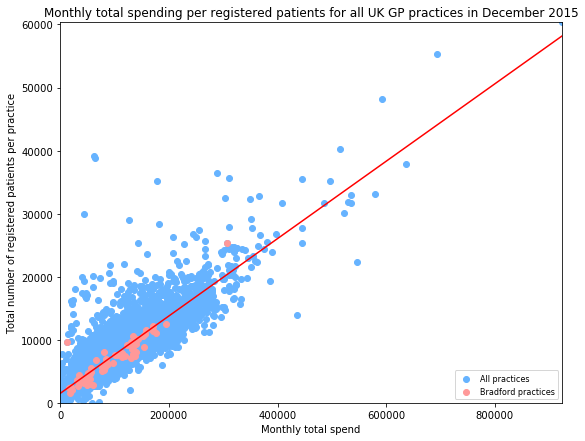

In [132]:
#scatter plot
fig=plt.figure(figsize=(9,7))
ax=fig.add_subplot(111)
x = costpatient['Total monthly spending (£)']
y = costpatient['patients']
#national
s1 = ax.scatter(x,y, c='#66b3ff')
a = bradford_costpp['Total monthly spending (£)']
b = bradford_costpp['patients']
#bradford
s2 = ax.scatter(a,b, c='#ff9999')
#titles 
ax.set_title('Monthly total spending per registered patients for all UK GP practices in December 2015')
ax.set_xlabel("Monthly total spend")
ax.set_ylabel('Total number of registered patients per practice')
#legend
plt.legend((s1, s2),
           ('All practices', 'Bradford practices'),
           scatterpoints=1,
           loc='lower right',
           ncol=1,
           fontsize=8)
#line of best fit
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), c='red')

#graph limits
max_x = floor(costpatient['Total monthly spending (£)'].max())
max_y = floor(costpatient['patients'].max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

plt.show()


# B4.
Visualize the relative costs per patient of all national GP-practices in a histogram.

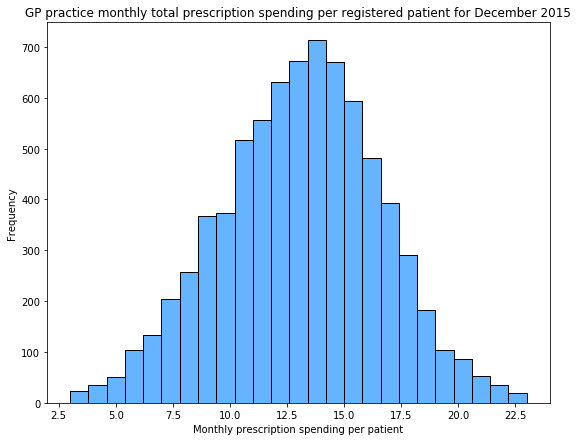

In [133]:
#histogram data: Relative cost per patient £ for each GP practice
a = costpatient.Relative_costs_per_patient.values
nbins = 25

#to exclude outliers
xmin = floor(costpatient['Relative_costs_per_patient'].quantile(.01))
xmax = floor(costpatient['Relative_costs_per_patient'].quantile(.99))

#histogram
plt.figure(figsize=(9,7))
plt.hist(a, bins=nbins, range=[xmin,xmax], color='#66b3ff', edgecolor="k")
plt.xlabel('Monthly prescription spending per patient')
plt.ylabel('Frequency')
plt.title("GP practice monthly total prescription spending per registered patient for December 2015")
plt.show()

# B5.
Use descriptive statistics to show how your assigned city compares to the national level.

In [134]:
#description of relative cost per patient for Bradford
print(bradford_costpp['Relative_costs_per_patient'].describe())


count    62.000000
mean     13.506854
std       3.226655
min       1.289418
25%      11.846597
50%      13.907730
75%      15.320909
max      22.127151
Name: Relative_costs_per_patient, dtype: float64


In [135]:
#description of relative cost per patient at National level
print(costpatient['Relative_costs_per_patient'].describe())

count     7701.000000
mean        21.317316
std        665.570655
min          0.001872
25%         10.689451
50%         13.212266
75%         15.504289
max      58319.780000
Name: Relative_costs_per_patient, dtype: float64


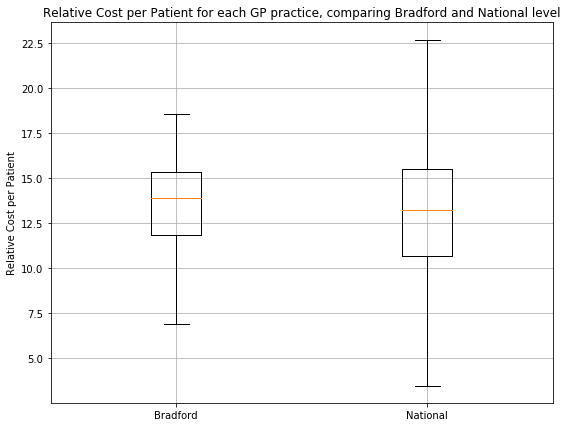

In [136]:
#boxplot to compare Braford and National level relative spend
plt.figure(figsize=(9,7))
plt.boxplot([bradford_costpp['Relative_costs_per_patient'],costpatient['Relative_costs_per_patient']],positions = [0,1], widths = 0.2, showfliers=False)
plt.grid()
plt.xticks([0,1],['Bradford', 'National'])
plt.ylabel('Relative Cost per Patient')
plt.title('Relative Cost per Patient for each GP practice, comparing Bradford and National level')

plt.show()



Using the restricted dataset (merged with demographic data) Bradford practices make up 0.805% of UK GP practices. Bradford has a much smaller mean relative cost per patient for prescriptions in December 2015 compared to the national average (£13.51 compared to £21.31). Bradford also has a reduced variation in relative spend per patient compare to the national level, with a narrower inter-quartile range. Overall Bradofrd appears to have spent less than the national average on prescriptions per person per practice in December 2015. 

National level relative spend per patient has some extreme outliers which have not been included in the graph and could be due to imputation error in the HSCIC_pres dataset. It is to be expected that the relative spend per patient per practice at the national level has greater variation and value extremes as it is a much larger sample size than Braford. 

# Assignment C
Assignment C [25 marks]
Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistcs:


# C1.
Identify for all GP-practices the relative costs per patient for all statin prescriptions (simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin) by using the dataset from December 2015.

In [137]:
#filter HSCIC_pres by statin
d1 = HSCIC_pres[HSCIC_pres['bnf_name'].str.contains("Atorvas")]
d2 = HSCIC_pres[HSCIC_pres['bnf_name'].str.contains('Simvast')]
d3 = HSCIC_pres[HSCIC_pres['bnf_name'].str.contains('Rosuvast')]
d4 = HSCIC_pres[HSCIC_pres['bnf_name'].str.contains('Pravast')]
d5 = HSCIC_pres[HSCIC_pres['bnf_name'].str.contains('Fluvast')]

#merge dataframes together to get prescription data for only statins 
HSCIC_statins = pd.concat([d1, d2, d3, d4, d5], ignore_index=True)

In [138]:
#group statin prescription data by practice and summarise act_cost
statinscost = HSCIC_statins.groupby('practice')[['act_cost']].sum().reset_index()
statinscost.columns=['practice','Total monthly spending on statins(£)']

In [139]:
#merge summarised statin prescription data with demographic data
statincostpp = pd.merge(left = demo_use, right=statinscost, on='practice')
#calculate Relative cost per patient (£)
statincostpp['Relative_costs_per_patient'] = statincostpp['Total monthly spending on statins(£)'] / statincostpp['patients']
pd.DataFrame(statincostpp[['practice', 'Total monthly spending on statins(£)','Relative_costs_per_patient']])

#Table of the relative cost of statins per patient for each GP practice

,practice,Total monthly spending on statins(£),Relative_costs_per_patient
0,A81001,1816.80,0.429098
1,A81002,6513.51,0.330786
2,A81003,868.39,0.258680
3,A81004,2134.60,0.233264
4,A81005,1887.11,0.239390
5,A81006,4074.99,0.330092
6,A81007,2245.57,0.230457
7,A81008,1398.07,0.347174
8,A81009,1588.11,0.173091
9,A81011,2945.80,0.257613


# C2.
Identify for all GP-practice the associated Index of Multiple Deprivation (IMD) for each GP-Practice in your assigned city.

In [140]:
#import IMD data: 
imd_url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv'
imd =  pd.read_csv(imd_url, index_col=False)

#filter for Bradford IMD data
imd_bradford = imd['Postcode'].str.startswith('BD')
bradford_imd = imd[imd_bradford]
bradford_imd_extract = bradford_imd[['Postcode', 'Index of Multiple Deprivation Rank', 'Index of Multiple Deprivation Decile']]

#Bradford IMD data with duplicates removed
bradford_sum = bradford_prac.drop_duplicates(subset='practice', keep='first', inplace=False)

In [141]:
#merging above with practice information to get practice specific imd index for Bradford 
bradford_imd_merged = pd.merge(left=bradford_imd_extract, right=bradford_sum, left_on='Postcode' , right_on='postcode')
bradford_imd_final = bradford_imd_merged.drop_duplicates(subset='practice', keep='first', inplace=False)
pd.DataFrame(bradford_imd_final[['practice', 'Postcode', 'Index of Multiple Deprivation Rank', 'Index of Multiple Deprivation Decile']])

#Table of Index of Multiple Deprivation Rank for Bradford GP practices

,practice,Postcode,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile
0,B83005,BD3 7HZ,2301.0,1.0
1,B83007,BD9 6LL,3163.0,1.0
2,B83008,BD21 2JH,284.0,1.0
3,B83009,BD12 9NG,2927.0,1.0
4,B83010,BD6 2DD,15309.0,5.0
5,B83011,BD5 8EL,1079.0,1.0
6,B83043,BD5 8EL,1079.0,1.0
9,B83012,BD8 9PB,2513.0,1.0
10,B83013,BD18 3EE,18719.0,6.0
11,Y00100,BD18 3EE,18719.0,6.0


# C3a. 
Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile.

In [142]:
#turn the statin dataset into decile by cost
statinscost['decile'] = pd.qcut(statinscost['Total monthly spending on statins(£)'], 10, labels=False)

least = statinscost[statinscost.decile == 0.0]
highest = statinscost[statinscost.decile == 9.0]

#top 10 lowest relative spenders on statins from first decile
pd.DataFrame(least.nsmallest(10,'Total monthly spending on statins(£)'))

,practice,Total monthly spending on statins(£),decile
8053,Y04567,0.14,0
8130,Y05107,0.15,0
7464,Y00483,0.19,0
8004,Y04115,0.20,0
7445,Y00401,0.22,0
7487,Y00605,0.23,0
7510,Y00752,0.23,0
8002,Y04106,0.23,0
2206,E83665,0.25,0
7560,Y01076,0.25,0


In [143]:
#top 10 highest relative spenders on statins from last decile
pd.DataFrame(highest.nlargest(10,'Total monthly spending on statins(£)'))

,practice,Total monthly spending on statins(£),decile
5907,M85063,16313.95,9
1260,C83019,11679.92,9
6202,M89003,10691.95,9
5261,L83100,10377.88,9
1815,D82044,10031.64,9
3442,G82071,9925.00,9
1356,C84024,9794.69,9
487,B81043,9359.53,9
783,B85019,8859.19,9
1263,C83022,8757.41,9


# C3b. 
Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD). Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer. 

In [144]:
#put postcode data into statins dataset
HSCIC_pracuse = HSCIC_prac[['practice', 'postcode']]
statins_sum = pd.merge(left=statinscost, right=HSCIC_pracuse, on='practice')

#merge imd and statinssum on postcode
statins_imd = pd.merge(left=statins_sum, right=imd, left_on='postcode', right_on='Postcode')
#remove duplicates
statins_imd_final = statins_imd.drop_duplicates(subset='practice', keep='first', inplace=False)

#extract first and last decile of 
least2 = statins_imd_final[statins_imd_final.decile == 0.0]
highest2 = statins_imd_final[statins_imd_final.decile == 9.0]

In [145]:
#descriptive statistics
#remove any NaN values
least2 = least2[np.isfinite(least2['Index of Multiple Deprivation Rank'])]
least2['Index of Multiple Deprivation Rank'].describe()

count      815.000000
mean     12312.934969
std       9137.927333
min         21.000000
25%       4525.500000
50%      10358.000000
75%      19396.500000
max      32839.000000
Name: Index of Multiple Deprivation Rank, dtype: float64

In [146]:
highest2['Index of Multiple Deprivation Rank'].describe()

count      816.000000
mean     15678.781863
std       9280.807146
min          3.000000
25%       8271.250000
50%      15201.500000
75%      23511.500000
max      32796.000000
Name: Index of Multiple Deprivation Rank, dtype: float64

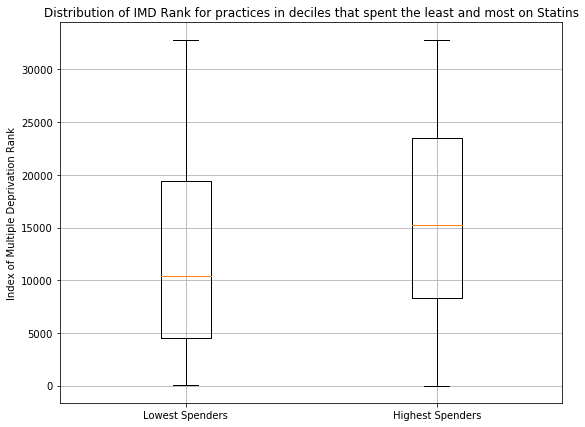

In [147]:
#boxplot to compare IMD rank in top and bottom decile of spenders on statins 
plt.figure(figsize=(9,7))
plt.boxplot([least2['Index of Multiple Deprivation Rank'].dropna(),highest2['Index of Multiple Deprivation Rank']],positions = [0,1], widths = 0.2)
plt.grid()
plt.xticks([0,1],['Lowest Spenders', 'Highest Spenders'])
plt.ylabel('Index of Multiple Deprivation Rank')
plt.title('Distribution of IMD Rank for practices in deciles that spent the least and most on Statins')

plt.show()


Practices within the top decile (the highest relative spenders on statins nationally in December 2015) have a greater mean Index of Multiple Deprivation Rank (IMD) than practices in the bottom decile (the lowest relative spenders on statins nationally in December 2015). 

A lower IMD rank score implies an area is more deprived. Therefore it can be summarised that practices that spent the least on statins in December 2015 were also those servicing the most deprived areas of the UK. This may suggest a relationship between the wealth/deprivation of the area a practice is servicing and practice funding for prescription issuing.


# C4.
Identify for all GP-practices the associated nine English regions. Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.

In [148]:
#Load in postcodes data
postcode_url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/postcodes.csv'
postcode =  pd.read_csv(postcode_url, index_col=False)
postcodeuse = postcode[['Postcode 1', 'Region Name']]
postcodeuse.rename(columns={'Postcode 1':'Postcode_1','Region Name':'Region_Name'}, inplace=True)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [149]:
#Load in cvd data
cvd_url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv'
cvd = pd.read_csv(cvd_url, index_col=False)
cvduse = cvd[['Year','Level description', 'Gender', 'Numerator', 'Denominator']]

In [150]:
#filter CVD data for use for mergiing
cvduse = cvduse[cvduse.Year == 2015]
cvduse = cvduse[cvduse.Gender == 'Person']

#remove non values
cvduse.Numerator = cvduse.Numerator.str.replace(',','')
cvduse.Denominator = cvduse.Denominator.str.replace(',','')

#make floats
cvduse.Numerator = cvduse.Numerator.astype(float)
cvduse.Denominator = cvduse.Denominator.astype(float)

,Year,Level description,Gender,Numerator,Denominator
1,2015,England,Person,33664.0,50360500.0
471,2015,East Midlands,Person,3171.0,4289500.0
472,2015,East of England,Person,3505.0,5541600.0
473,2015,London,Person,4037.0,8208700.0
474,2015,North East,Person,2000.0,2399000.0


In [151]:
#remove whitespace from statinsum postcode so it can be merged with postcode dataset 
def remove_whitespace(x):
        x = "".join(x.split())
        return x

statins_sum.postcode = statins_sum.postcode.apply(remove_whitespace)
postcodeuse.Postcode_1 = postcodeuse.Postcode_1.apply(remove_whitespace)


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [152]:
#merge statins_sum with postcode data
statinpostcode1 = pd.merge(left=statins_sum, right=postcodeuse, left_on='postcode', right_on='Postcode_1' )
statinpostcode1_final = statinpostcode1.drop_duplicates(subset='practice', keep='first', inplace=False)

In [153]:
#merge cvduse and statin_postcode_final
statpostcvd_merged = pd.merge(left=cvduse, right=statinpostcode1_final, right_on = 'Region_Name', left_on='Level description')

#number of practices going into mortality rate
statpostcvd_merged['practice'].describe()

count       8113
unique      8113
top       Y05008
freq           1
Name: practice, dtype: object

In [154]:
#group statin spend by region
regional_mortality = statpostcvd_merged.groupby('Region_Name')[['Numerator', 'Denominator', 'practice']].sum().reset_index()


#calculate mortality rate 
#Here mortality rate is calculated in units of death per 100,000 individuals for 2015. 
#e.g. East Midlands mortality rate is 7 per 10,000 people in 2015. 

regional_mortality['Mortality rate'] = regional_mortality['Numerator'] / regional_mortality['Denominator'] * 100000

pd.DataFrame(regional_mortality[['Region_Name', 'Mortality rate']])
#Regional table of mortality rate for CVD related diseases in 2015 per 100,000 people

,Region_Name,Mortality rate
0,East Midlands,73.924700
1,East of England,63.248881
2,London,49.179529
3,North East,83.368070
4,North West,82.133374
5,South East,57.134816
6,South West,67.197601
7,West Midlands,71.666919
8,Yorkshire and The Humber,76.219143


# C5 
Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis]. Assess whether relative spending for statin prescriptions in each regions correlates with the mortality rate from cardiovascular diseases.

In [155]:
#create region statin spend dataframe
regional_statin = statpostcvd_merged.groupby('Region_Name')[['Total monthly spending on statins(£)']].sum()
pd.DataFrame(regional_statin)

,Total monthly spending on statins(£)
Region_Name,
East Midlands,1047261.20
East of England,1308119.72
London,1584602.83
North East,707243.33
North West,1863060.53
South East,2028574.78
South West,1333538.97
West Midlands,1406792.26
Yorkshire and The Humber,1441297.37


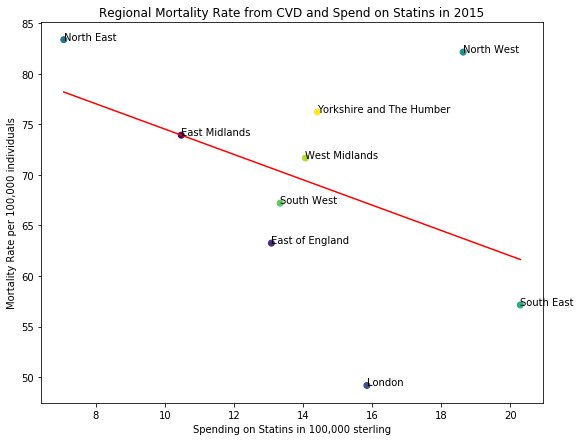

In [156]:
#figure plotting regional statin spend against CVD mortality rate
plt.figure(figsize=(9,7))
ax = plt.gca()
x = regional_statin['Total monthly spending on statins(£)']
y = regional_mortality['Mortality rate']
n = ['East Midlands', 'East of England', 'London', 'North East', 'North West', 'South East', 'South West', 'West Midlands', 'Yorkshire and The Humber']
t = np.arange(9)

#setting x label to £100,000 people incriments
x_labels = [6,8,10,12,14,16,18,20,22]
ax.set_xticklabels(x_labels)

#plot
plt.scatter(x,y, c=t)
plt.ylabel('Mortality Rate per 100,000 individuals')
plt.xlabel('Spending on Statins in 100,000 sterling')
plt.title('Regional Mortality Rate from CVD and Spend on Statins in 2015')

#scatter labels
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))
    
#for line of best fit
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), c='red')

plt.show()

In [157]:
#calculate correlation coefficient for relationship between statin spend and CVD mortality rate
x = regional_statin['Total monthly spending on statins(£)']
y = regional_mortality['Mortality rate']
np.corrcoef(x,y)

array([[ 1.        , -0.43822148],
       [-0.43822148,  1.        ]])

From the line of best fit and results of correlation coefficient it can be seen that there is a weak negative correlation between increasing spend on statins per region and mortality rate for cardiovascular diseases. 


# Assignment D 
Assignment D [25 marks]
Using the Google FluTrends surveillance data, pick two random countries, one in the Northern hemisphere and one in the Southern hemisphere. For each of country:



In [35]:
#importing southern and northen hemisphere data 
#northern - RUSSIA
google_russ_url = 'https://www.google.org/flutrends/about/data/flu/ru/data.txt'
google_russ =  pd.read_csv(google_russ_url, sep=',', skiprows=11)
google_russ['Date'] = pd.to_datetime(google_russ['Date'], format='%Y/%m/%d')

#new dataframe with date as index
google_russ_1 = google_russ.set_index(pd.DatetimeIndex(google_russ['Date']))
#remove duplicate date column
del google_russ_1['Date']


In [36]:
#southern - PARAGUAY
google_par_url = 'https://www.google.org/flutrends/about/data/flu/py/data.txt'
google_par =  pd.read_csv(google_par_url, sep=',', skiprows=11)
google_par['Date'] = pd.to_datetime(google_par['Date'], format='%Y/%m/%d')

#new df with date as index
google_par_1 = google_par.set_index(pd.DatetimeIndex(google_par['Date']))
#remove duplicate date column
del google_par_1['Date']


# D1.
Provide a visualisation of the seasonal patterns across all years.

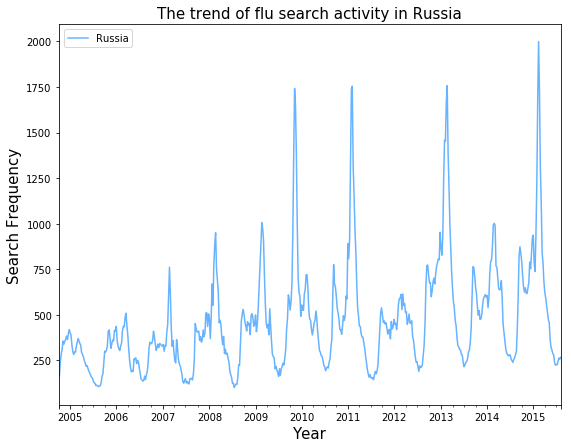

In [90]:
#flu trend graph-Russia only
fig_russ = google_russ.plot(x='Date', figsize=(9,7), c='#66b3ff')
fig_russ.set_title('The trend of flu search activity in Russia',fontsize=15)
fig_russ.set_ylabel('Search Frequency',fontsize=15)
fig_russ.set_xlabel('Year',fontsize=15)

plt.show()

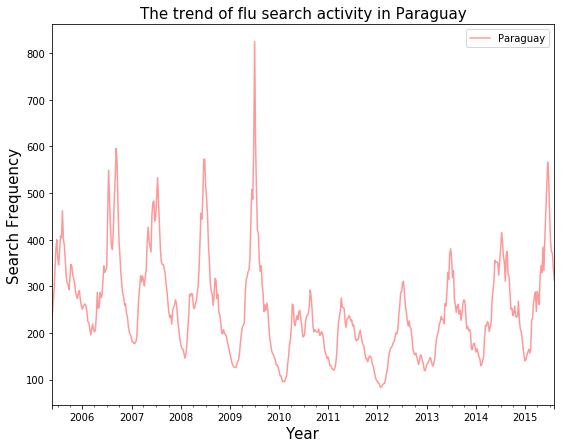

In [91]:
#flu trend graph-Paraguay only
fig_par = google_par.plot(x='Date', figsize=(9,7), color='#ff9999')
fig_par.set_title('The trend of flu search activity in Paraguay',fontsize=15)
fig_par.set_ylabel('Search Frequency',fontsize=15)
fig_par.set_xlabel('Year',fontsize=15)

plt.show()

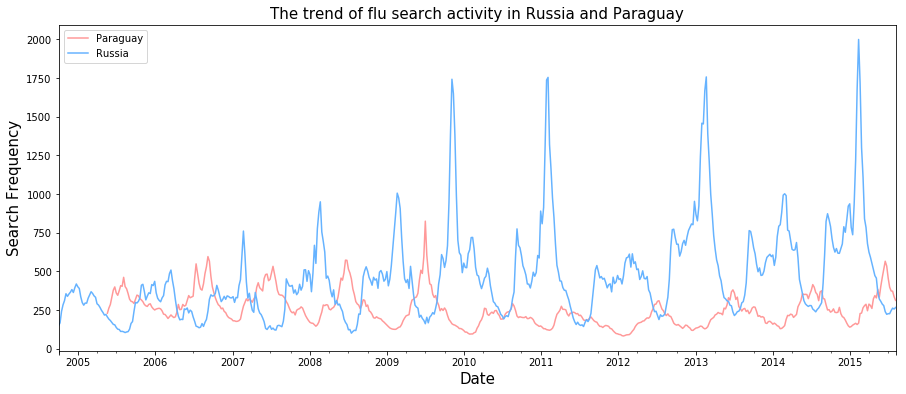

In [93]:
%matplotlib inline

#Plot and store the flu trends for Paraguay
ax = google_par.plot(legend ='left', x='Date', y = 'Paraguay', c='#ff9999', figsize=(15, 6), grid=True)

#labels
ax.set_title('The trend of flu search activity in Russia and Paraguay',fontsize=15)
ax.set_ylabel('Search Frequency',fontsize=15)
ax.set_xlabel('Year',fontsize=15)

#Plot Russia on same axis
google_russ.plot(x='Date', y = 'Russia' , c='#66b3ff', ax=ax)

# D2a.
Calculate the yearly minimum and maximum for each country.

In [37]:
#Russia yearly Maximum 
#use pandas timeGrouper function
google_russ_max = google_russ_1.groupby(pd.TimeGrouper('A')).max()
#rename Russia column
google_russ_max.rename(columns={'Russia': 'Russia_Yearly_Max_Search'}, inplace=True)

#Russia yearly Minimum
google_russ_min = google_russ_1.groupby(pd.TimeGrouper('A')).min()
#rename Russia column
google_russ_min.rename(columns={'Russia': 'Russia_Yearly_Min_Search'}, inplace=True)

#merge results into 1 dataframe
russ_maxmin = pd.concat([google_russ_min, google_russ_max], axis=1)
pd.DataFrame(russ_maxmin)
russ_maxmin.reset_index(drop=False)

,Date,Russia_Yearly_Min_Search,Russia_Yearly_Max_Search
0,2004-12-31,150,419
1,2005-12-31,105,417
2,2006-12-31,136,509
3,2007-12-31,121,761
4,2008-12-31,101,950
5,2009-12-31,162,1742
6,2010-12-31,193,775
7,2011-12-31,144,1754
8,2012-12-31,189,953
9,2013-12-31,215,1757


In [68]:
#Paraguay yearly Maximum 
#use pandas timeGrouper function
google_par_max = google_par_1.groupby(pd.TimeGrouper('A')).max()
#rename Russia column
google_par_max.rename(columns={'Paraguay': 'Paraguay_Yearly_Max_Search'}, inplace=True)

#Russia yearly Minimum
google_par_min = google_par_1.groupby(pd.TimeGrouper('A')).min()
#rename Russia column
google_par_min.rename(columns={'Paraguay': 'Paraguay_Yearly_Min_Search'}, inplace=True)

#concatinate into 1 dataframe
par_maxmin = pd.concat([google_par_min, google_par_max], axis=1)
pd.DataFrame(par_maxmin)
par_maxmin.reset_index(drop=False)

,Date,Paraguay_Yearly_Min_Search,Paraguay_Yearly_Max_Search
0,2005-12-31,230,462
1,2006-12-31,192,596
2,2007-12-31,177,533
3,2008-12-31,146,573
4,2009-12-31,126,825
5,2010-12-31,95,292
6,2011-12-31,99,275
7,2012-12-31,83,311
8,2013-12-31,129,381
9,2014-12-31,130,415


# D2b.  
Provide and plot a reasonable mathematical function that could be used as an approximation for the seasonal trend for each country.

For both Russian and Paraquay the yearly seasonal trends in flu searches appear to follow a sinusoidal model with peak flu searches for Russia appearing to coincide with northern hemisphere winter months and least searches during the Northern Hemisphere summer months. 

# Trigonometric modelling

In [71]:
#creating sinusoidal model parameters for Russia
#midline
russ_maxmin['russ_midline'] = (russ_maxmin['Russia_Yearly_Max_Search'] - russ_maxmin['Russia_Yearly_Min_Search']) / 2

#amplitude
russ_maxmin['russ_amp'] = russ_maxmin['Russia_Yearly_Max_Search'] - russ_maxmin['russ_midline']

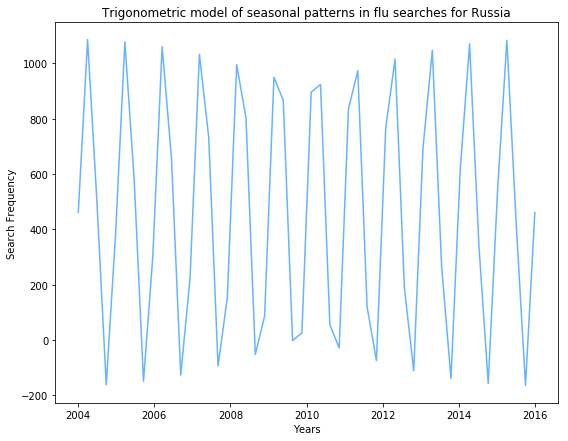

In [113]:
#russia sinusoidal model equation

#amplitude
amp = russ_maxmin['russ_amp'].mean()

#phase shift
shift = russ_maxmin['russ_midline'].mean()

#time
t = np.linspace(2004, 2016)

#sinusoidal equation
y =  amp * np.sin(2*np.pi*t) + shift

#plot
fig=plt.figure(figsize=(9,7))
plt.plot(t, y, c='#66b3ff')
plt.xlabel('Years')
plt.ylabel('Search Frequency')
plt.title('Trigonometric model of seasonal patterns in flu searches for Russia')
plt.show()

In [69]:
#creating sinusoidal model parameters for Paraguay
par_maxmin['par_midline'] = (par_maxmin['Paraguay_Yearly_Max_Search'] - par_maxmin['Paraguay_Yearly_Min_Search']) / 2

par_maxmin['par_amp'] = par_maxmin['Paraguay_Yearly_Max_Search'] - par_maxmin['par_midline']

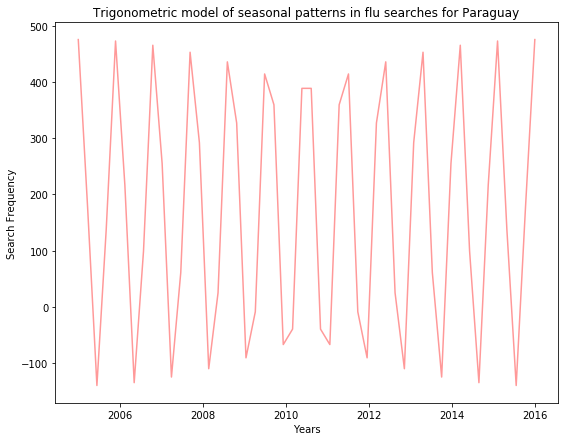

In [115]:
#paraguay sinusoidal model equation

#amplitude
amp = par_maxmin['par_amp'].mean()

#phase shift
shift = par_maxmin['par_midline'].mean()

#time
t1 = np.linspace(2005, 2016)

#sinusoidal equation ' using cosine model as Paraguay has opposite peaks and troughs to Russia
y1 =  amp * np.cos(2*np.pi*t) + shift

#plot
fig=plt.figure(figsize=(9,7))
plt.plot(t1, y1, c='#ff9999')
plt.xlabel('Years')
plt.ylabel('Search Frequency')
plt.title('Trigonometric model of seasonal patterns in flu searches for Paraguay')
plt.show()

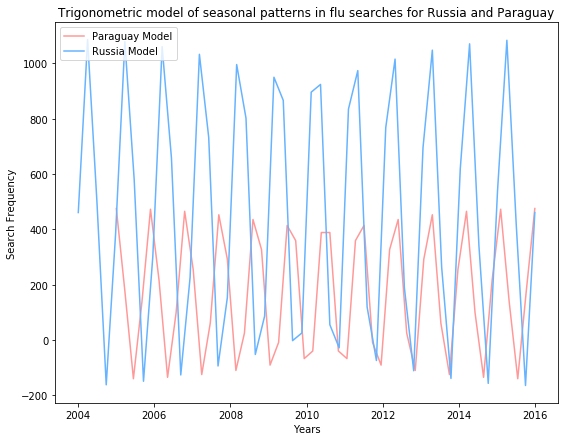

In [116]:
#plot both trigonometric models on 1 axis

fig=plt.figure(figsize=(9,7))
plt.plot(t1, y1, c='#ff9999', label='Paraguay Model')
plt.plot(t, y, c='#66b3ff', label='Russia Model')
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Search Frequency')
plt.title('Trigonometric model of seasonal patterns in flu searches for Russia and Paraguay')


plt.show()

# Rolling Mean Modelling 
Alternative model using a rolling mean calculation to approximate for the seasonal trends in flu searches for each country.

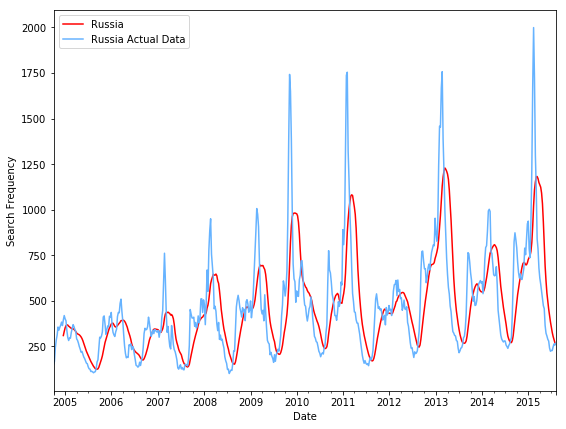

In [120]:
#for each time point you take the average of the points on either side of it.
#the number of points is specified by a window size rolling.(windowsize)
#a 12 month window size should be appropriate as are investigating seasonality
    
russs = google_russ_1[['Russia']]
#rolling mean
ax = russs.rolling(12).mean().plot(label='rolling mean', figsize=(9,7), c='red',)
plt.xlabel('Years')
plt.ylabel('Search Frequency')
#actual trend data
google_russ.plot(x='Date', y = 'Russia' , c='#66b3ff', ax=ax, label='Russia Actual Data')


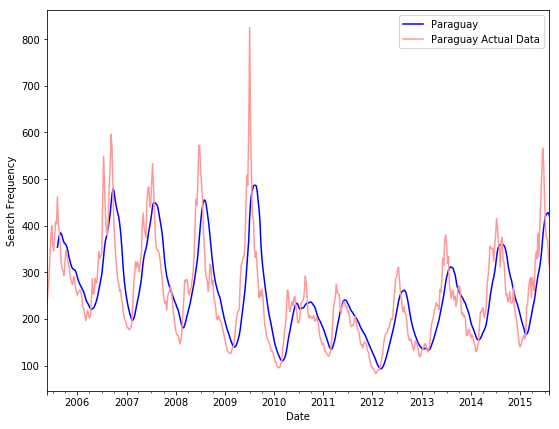

In [121]:
#rolling mean paraguay 
para = google_par_1[['Paraguay']]
#rolling mean
ax = para.rolling(12).mean().plot(figsize=(9,7), c='blue')
plt.xlabel('Years')
plt.ylabel('Search Frequency')
#actual trend data
google_par.plot(x='Date', y = 'Paraguay' , c='#ff9999', ax=ax, label='Paraguay Actual Data')